In [122]:
import numpy as np
import torch
import sys
from utils import *
from matplotlib import pyplot as plt
import torch.nn as nn
import time
from numba import cuda
from tqdm import tqdm, trange
import os
import pyroc
import pandas as pd
import gc
from IPython.display import clear_output
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"  
device = torch.device("cuda:0")
dtype = torch.float32
torch.manual_seed(42)
np.random.seed(42)

In [123]:
ns = np.array([1300000, 1000000, 700000, 400000, 200000, 50000, 5000])

# Draw p-n


In [124]:
ps_L = np.ones(ns.shape[0]) * np.nan
ps_G = np.ones(ns.shape[0]) * np.nan
ps_O = np.ones(ns.shape[0]) * np.nan
ps_S = np.ones(ns.shape[0]) * np.nan
ps_B = np.ones(ns.shape[0]) * np.nan
ps_L_std = np.ones(ns.shape[0]) * np.nan
ps_G_std = np.ones(ns.shape[0]) * np.nan
ps_O_std = np.ones(ns.shape[0]) * np.nan
ps_S_std = np.ones(ns.shape[0]) * np.nan
ps_B_std = np.ones(ns.shape[0]) * np.nan
ps_L_thres = np.ones(ns.shape[0]) * np.nan
ps_G_thres = np.ones(ns.shape[0]) * np.nan
ps_O_thres = np.ones(ns.shape[0]) * np.nan
ps_S_thres = np.ones(ns.shape[0]) * np.nan
ps_L_thres_std = np.ones(ns.shape[0]) * np.nan
ps_G_thres_std = np.ones(ns.shape[0]) * np.nan
ps_O_thres_std = np.ones(ns.shape[0]) * np.nan
ps_S_thres_std = np.ones(ns.shape[0]) * np.nan
ps_S_thres_5 = np.ones(ns.shape[0]) * np.nan
ps_S_thres_5_std = np.ones(ns.shape[0]) * np.nan

ps_R = np.ones(ns.shape[0]) * np.nan
ps_R_std = np.ones(ns.shape[0]) * np.nan
ps_R_thres = np.ones(ns.shape[0]) * np.nan
ps_R_thres_std = np.ones(ns.shape[0]) * np.nan

for i in range(len(ns)):
    n = ns[i]
    try:
        temp = np.load('./Mix/%d_soft.npy'%n)
        ps_L[i] = np.mean(temp)
        ps_L_std[i] = np.std(temp)
        temp = np.load('./Mix/%d_hard.npy'%n)
        ps_L_thres[i] = np.mean(temp)
        ps_L_thres_std[i] = np.std(temp)
    except: pass
    try:
        temp = np.load('./Fea_Gau/%d_soft.npy'%n)
        ps_G[i] = np.mean(temp)
        ps_G_std[i] = np.std(temp)
        temp = np.load('./Fea_Gau/%d_hard.npy'%n)
        ps_G_thres[i] = np.mean(temp)
        ps_G_thres_std[i] = np.std(temp)
    except: pass
    try:
        temp = np.load('./Gaussian/%d_soft.npy'%n)
        ps_O[i] = np.mean(temp)
        ps_O_std[i] = np.std(temp)
        temp = np.load('./Gaussian/%d_hard.npy'%n)
        ps_O_thres[i] = np.mean(temp)
        ps_O_thres_std[i] = np.std(temp)
    except: pass
    try:
        temp = np.load('./Scheffe/%d_soft.npy'%n)
        ps_S[i] = np.mean(temp)
        ps_S_std[i] = np.std(temp)
        temp = np.load('./Scheffe/%d_hard.npy'%n)
        ps_S_thres[i] = np.mean(temp)
        ps_S_thres_std[i] = np.std(temp)
    except: pass
    try:
        temp = np.load('./Scheffe/%d_05.npy'%n)
        ps_S_thres_5[i] = np.mean(temp)
        ps_S_thres_5_std[i] = np.std(temp)
    except: pass
    try:
        temp = np.load('./Res_Net/%d_soft.npy'%n)
        ps_R[i] = np.mean(temp)
        ps_R_std[i] = np.std(temp)
        temp = np.load('./Res_Net/%d_hard.npy'%n)
        ps_R_thres[i] = np.mean(temp)
        ps_R_thres_std[i] = np.std(temp)
    except: pass
    try:
        temp = np.load('./LBI/%d_soft.npy'%n)
        ps_B[i] = np.mean(temp)
        ps_B_std[i] = np.std(temp)
    except: pass


/math/home/eruisun/software/anaconda/envs/LFI/lib/python3.9/site-packages/numpy/core/_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [125]:
import numpy as np
import matplotlib.pyplot as plt
def load_pval_mean_var(ns):
    pval_dict = {
        'Res_Net_soft':{'data': {}},
        'Res_Net_hard':{'data': {}},
        'Mix_soft':{'data': {}},
        'Mix_hard':{'data': {}},
        'LBI_soft':{'data': {}},
        # 'LBI_hard':{},
        'Fea_Gau_soft':{'data': {}},
        'Fea_Gau_hard':{'data': {}},
        'Gaussian_soft':{'data': {}},
        'Gaussian_hard':{'data': {}},
        'Scheffe_soft':{'data': {}},
        'Scheffe_hard':{'data': {}},
        'Scheffe_05':{'data': {}},
        'UME_soft':{'data': {}},
        'UME_hard':{'data': {}},
        'RFM_soft':{'data': {}},
        'RFM_hard':{'data': {}},
        'RFM_soft_MMD':{'data': {}},
        'RFM_hard_MMD':{'data': {}},
    }

    for n in ns:
        try: pval_dict['Res_Net_soft']['data'][n] = np.load('./Res_Net/%d_soft.npy'%n)
        except: pass
        try: pval_dict['Res_Net_hard']['data'][n] = np.load('./Res_Net/%d_hard.npy'%n)
        except: pass
        try: pval_dict['Mix_soft']['data'][n] = np.load('./Mix/%d_soft.npy'%n)
        except: pass
        try: pval_dict['Mix_hard']['data'][n] = np.load('./Mix/%d_hard.npy'%n)
        except: pass
        try: pval_dict['LBI_soft']['data'][n] = np.load('./LBI/%d_soft.npy'%n)
        except: pass
        # try: pval_dict['LBI_hard'][n] = np.load('./LBI/%d_hard.npy'%n)
        # except: pass
        try: pval_dict['Fea_Gau_soft']['data'][n] = np.load('./Fea_Gau/%d_soft.npy'%n)
        except: pass
        try: pval_dict['Fea_Gau_hard']['data'][n] = np.load('./Fea_Gau/%d_hard.npy'%n)
        except: pass
        try: pval_dict['Gaussian_soft']['data'][n] = np.load('./Gaussian/%d_soft.npy'%n)
        except: pass
        try: pval_dict['Gaussian_hard']['data'][n] = np.load('./Gaussian/%d_hard.npy'%n)
        except: pass
        try: pval_dict['Scheffe_soft']['data'][n] = np.load('./Scheffe/%d_soft.npy'%n)
        except: pass
        try: pval_dict['Scheffe_hard']['data'][n] = np.load('./Scheffe/%d_hard.npy'%n)
        except: pass
        try: pval_dict['Scheffe_05']['data'][n] = np.load('./Scheffe/%d_05.npy'%n)
        except: pass
        try: pval_dict['UME_soft']['data'][n] = np.load('./UME/pval_data/n_tr=%d_soft.npy'%n)
        except: pass
        try: pval_dict['UME_hard']['data'][n] = np.load('./UME/pval_data/n_tr=%d_hard.npy'%n)
        except: pass
        try: pval_dict['RFM_soft']['data'][n] = np.load('./RFM/pval_data/n_tr=%d_soft.npy'%n)
        except: pass
        try: pval_dict['RFM_hard']['data'][n] = np.load('./RFM/pval_data/n_tr=%d_hard.npy'%n)
        except: pass
        try: pval_dict['RFM_soft_MMD']['data'][n] = np.load('./RFM/pval_data/n_tr=%d_soft_MMD.npy'%n)
        except: pass
        try: pval_dict['RFM_hard_MMD']['data'][n] = np.load('./RFM/pval_data/n_tr=%d_hard_MMD.npy'%n)
        except: pass

        # pval_dict['Res_Net_hard']['data'][n] = np.load('./Res_Net/%d_hard.npy'%n)
        # pval_dict['Mix_soft']['data'][n] = np.load('./Mix/%d_soft.npy'%n)
        # pval_dict['Mix_hard']['data'][n] = np.load('./Mix/%d_hard.npy'%n)
        # pval_dict['LBI_soft']['data'][n] = np.load('./LBI/%d_soft.npy'%n)
        # # pval_dict['LBI_hard'][n] = np.load('./LBI/%d_hard.npy'%n)
        # pval_dict['Fea_Gau_soft']['data'][n] = np.load('./Fea_Gau/%d_soft.npy'%n)
        # pval_dict['Fea_Gau_hard']['data'][n] = np.load('./Fea_Gau/%d_hard.npy'%n)
        # pval_dict['Gaussian_soft']['data'][n] = np.load('./Gaussian/%d_soft.npy'%n)
        # pval_dict['Gaussian_hard']['data'][n] = np.load('./Gaussian/%d_hard.npy'%n)
        # pval_dict['Scheffe_soft']['data'][n] = np.load('./Scheffe/%d_soft.npy'%n)
        # pval_dict['Scheffe_hard']['data'][n] = np.load('./Scheffe/%d_hard.npy'%n)
        # pval_dict['Scheffe_05']['data'][n] = np.load('./Scheffe/%d_05.npy'%n)
        # pval_dict['UME_soft']['data'][n] = np.load('./UME/pval_data2048/n_tr=%d_soft.npy'%n)
        # pval_dict['UME_hard']['data'][n] = np.load('./UME/pval_data2048/n_tr=%d_hard.npy'%n)
        # pval_dict['RFM_hard']['data'][n] = np.load('./RFM/pval_data/n_tr=%d_hard.npy'%n)
        # pval_dict['RFM_soft']['data'][n] = np.load('./RFM/pval_data/n_tr=%d_soft.npy'%n)
        # pval_dict['RFM_hard_MMD']['data'][n] = np.load('./RFM/pval_data/n_tr=%d_hard_MMD.npy'%n)
        # pval_dict['RFM_soft_MMD']['data'][n] = np.load('./RFM/pval_data/n_tr=%d_soft_MMD.npy'%n)

    for key in pval_dict.keys():
        pval_dict[key]['mean'] = np.zeros(len(ns))
        pval_dict[key]['std'] = np.zeros(len(ns))
        for i,n in enumerate(ns):
            try: pval_dict[key]['mean'][i] = np.mean(pval_dict[key]['data'][n])
            except:  pval_dict[key]['mean'][i] = np.nan
            try: pval_dict[key]['std'][i] = np.std(pval_dict[key]['data'][n])
            except: pval_dict[key]['std'][i] = np.nan
    return pval_dict

pval_dict = load_pval_mean_var(ns)

# Plot

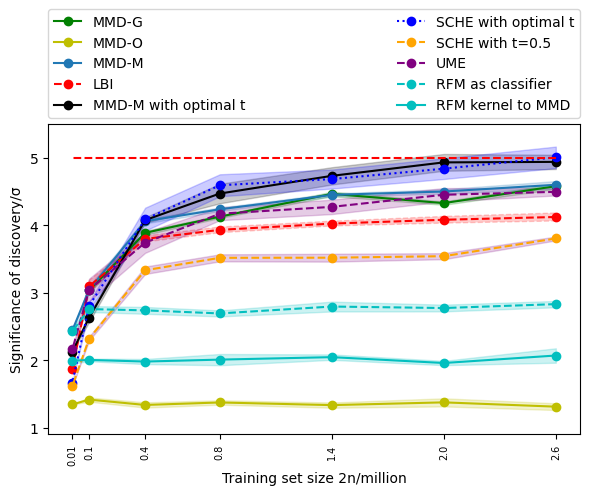

In [126]:
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
fig = plt.figure(figsize=(6, 5))
# plt.plot(ns, ps_L, label='MMD-M', marker='o', alpha=0.99, color=colors[3], linestyle='-.')
# plt.fill_between(ns, ps_L-ps_L_std, ps_L+ps_L_std, alpha=0.2, color=colors[3])

plt.plot(ns, ps_G, label='MMD-G', marker='o', alpha=0.99, color=colors[1])
plt.fill_between(ns, ps_G-ps_G_std, ps_G+ps_G_std, alpha=0.2, color=colors[1])

plt.plot(ns, ps_O, label='MMD-O', marker='o', alpha=0.99, color=colors[5])
plt.fill_between(ns, ps_O-ps_O_std, ps_O+ps_O_std, alpha=0.2, color=colors[5])

plt.plot(ns, ps_R, label='MMD-M', marker='o', alpha=0.99, color='C0')
plt.fill_between(ns, ps_R-ps_R_std, ps_R+ps_R_std, alpha=0.2, color='C0')

plt.plot(ns, ps_B, label='LBI', marker='o', alpha=0.99, color=colors[0], linestyle='--')
plt.fill_between(ns, ps_B-ps_B_std, ps_B+ps_B_std, alpha=0.2, color=colors[0], linestyle='--')

# plt.plot(ns, ps_L_thres, label='MMD-M with optimal t', marker='o', alpha=0.99, color=colors[4], linestyle='-.')
# plt.fill_between(ns, ps_L_thres-ps_L_thres_std, ps_L_thres+ps_L_thres_std, alpha=0.2, color=colors[4], linestyle='-.')

# plt.plot(ns, ps_G_thres, label='MMD-G with optimal t', marker='o', alpha=0.99, color='C2', linestyle=':')
# plt.fill_between(ns, ps_G_thres-ps_G_thres_std, ps_G_thres+ps_G_thres_std, alpha=0.2, color='C2')

plt.plot(ns, ps_R_thres, label='MMD-M with optimal t', marker='o', alpha=0.99, color='k')
plt.fill_between(ns, ps_R_thres-ps_R_thres_std, ps_R_thres+ps_R_thres_std, alpha=0.2, color='k')

# plt.plot(ns, ps_O_thres, label='MMD-O with optimal t', marker='o', alpha=0.9, color='pink')
# plt.fill_between(ns, ps_O_thres-ps_O_thres_std, ps_O_thres+ps_O_thres_std, alpha=0.2, color='pink')

plt.plot(ns, ps_S_thres, label='SCHE with optimal t', marker='o', alpha=0.99, color=colors[2], linestyle=':')
plt.fill_between(ns, ps_S_thres-ps_S_thres_std, ps_S_thres+ps_S_thres_std, alpha=0.2, color=colors[2])

plt.plot(ns, ps_S_thres_5, label='SCHE with t=0.5', marker='o', alpha=0.99, color='orange', linestyle='--')
plt.fill_between(ns, ps_S_thres_5-ps_S_thres_5_std, ps_S_thres_5+ps_S_thres_5_std, alpha=0.2, color='purple')

plt.plot(ns, pval_dict['UME_soft']['mean'], label='UME', marker='o', alpha=0.99, color='purple', linestyle='--')
plt.fill_between(ns, pval_dict['UME_soft']['mean']-pval_dict['UME_soft']['std'], pval_dict['UME_soft']['mean']+pval_dict['UME_soft']['std'], alpha=0.2, color='purple')

# plt.plot(ns, pval_dict['UME_hard']['mean'], label='UME', marker='o', alpha=0.99, color='purple', linestyle='--')
# plt.fill_between(ns, pval_dict['UME_hard']['mean']-pval_dict['UME_hard']['std'], pval_dict['UME_hard']['mean']+pval_dict['UME_hard']['std'], alpha=0.2, color='purple')

plt.plot(ns, pval_dict['RFM_soft']['mean'], label='RFM as classifier', marker='o', alpha=0.99, color='c', linestyle='--')
plt.fill_between(ns, pval_dict['RFM_soft']['mean']-pval_dict['RFM_soft']['std'], pval_dict['RFM_soft']['mean']+pval_dict['RFM_soft']['std'], alpha=0.2, color='c')

plt.plot(ns, pval_dict['RFM_soft_MMD']['mean'], label='RFM kernel to MMD', marker='o', alpha=0.99, color='c', linestyle='-')
plt.fill_between(ns, pval_dict['RFM_soft_MMD']['mean']-pval_dict['RFM_soft_MMD']['std'], pval_dict['RFM_soft_MMD']['mean']+pval_dict['RFM_soft_MMD']['std'], alpha=0.2, color='c')


plt.legend(bbox_to_anchor =(1, 1))
plt.xlabel('Training set size 2n/million')
plt.xticks(ns, ns*2/10**6)
# plt.xticks(ns, [2.6, 2.0, 1.4, 0.8, 0.4, '0.1', '2k'])
plt.ylabel('Significance of discovery/σ')
plt.ylim(0.9, 5.5)
# plt.xlim(0, 2.6)
#plt.title('Test on 1000 backgrounds and 100 signals')
#plt.tight_layout()
plt.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=2)

#plt.yticks([cc, 2*cc, 3*cc, 4*cc, 5*cc, 5], [1, 2, 3, 4 ,5, '5σ'])
plt.plot(ns, 5*np.ones(ns.shape[0]), 'r--')
plt.tight_layout()
plt.tick_params(axis='x', which='major', labelsize=7)
plt.xticks(rotation=90)
plt.savefig('./plots/Significance of discovery.pdf')
plt.show()

In [127]:
ns*2/10**6

array([2.6 , 2.  , 1.4 , 0.8 , 0.4 , 0.1 , 0.01])